# Great Wines Data Analysis 

## Making dataframe from dataset 

(Basic EDA and cleaning)

In [1]:
# Set up environment  
import pandas as pd
import numpy as np

In [2]:
# Read in data set and check columns 
wine_old = pd.read_csv("winemag-data-130k-v2.csv", index_col = False)
wine_old.columns 

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [3]:
# Make subset from original dataframe 
wine = wine_old[wine_old.columns.difference(["Unnamed: 0", "region_2", "winery", "taster_twitter_handle", "designation"])]
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


Kept: description, year (from the title), variety, location (country, province, region_1), price, taster_name, points 

In [4]:
# Check for nulls - assume country and province are for same rows 
wine.isnull().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
dtype: int64

In [5]:
# Drop na for country, variety, price (province is dropped too)
wine = wine.dropna(subset = ["country", "variety", "price"])
wine.isnull().sum()

country            0
description        0
points             0
price              0
province           0
region_1       19515
taster_name    24495
title              0
variety            0
dtype: int64

In [6]:
wine.shape

(120915, 9)

In [7]:
# Set to 'None' for some region_1 and taster_name 
wine = wine.replace(np.nan, 'None', regex = True)

In [8]:
wine.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
dtype: int64

In [9]:
# Check to see negative values 
wine.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


#### Correlation between points and price 

In [10]:
wine.corr().round(2)

,points,price
points,1.00,0.42
price,0.42,1.00


In [11]:
import matplotlib.pyplot as plt

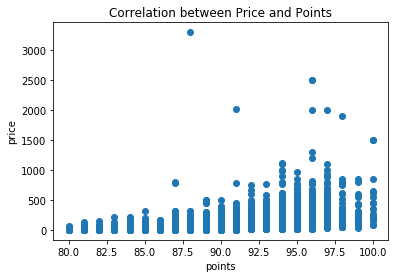

In [12]:
# Price and points plot to include in report (potentially) 
plt.scatter(wine['points'], wine['price'])
plt.title("Correlation between Price and Points")
plt.ylabel("price")
plt.xlabel("points")
plt.show()

In [13]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot


#### Creating the location column 

In [14]:
# Created a new location column as a concatenation of 3 features 
cols = ["country", "province", "region_1"]
wine["location"] = wine[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [15]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety,location
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal_Douro_None
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US_Oregon_Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US_Michigan_Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US_Oregon_Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Spain_Northern Spain_Navarra


#### Parsing out the year from text  

In [16]:
# Get the year 
wineCopy= wine['title'].str.extract(r'([1-2][0-9]{3}.*[1-2][0-9]{3} |[1-2][0-9]{3})', expand=False)

In [17]:
def is_number(n):
    is_number = True
    try:
        num = float(n)
        # check for "nan" floats
        is_number = num == num   # or use `math.isnan(num)`
    except ValueError:
        is_number = False
    return is_number
def getYears(val):
    res = [int(i) for i in val.split() if i.isdigit()]
    return res
def condMax(years):
    max = -100
    for year in years:
        if year > max and year <2020:
            max = year
    return max
def extractYear(year):
    out = list()
    for val in year:
        if len(str(val)) > 4:
            years = getYears(val)
            out.append(condMax(years))
        else:
            out.append(val)
    return out


In [18]:
cleanYears = pd.Series(extractYear(wineCopy))

In [19]:
wine.insert(9,"year", cleanYears)

In [20]:
wine = wine.astype({"year": float})

In [21]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety,year,location
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2013.0,Portugal_Douro_None
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,2013.0,US_Oregon_Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,2012.0,US_Michigan_Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,2011.0,US_Oregon_Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,2013.0,Spain_Northern Spain_Navarra


## Mini Text Analysis for description column 

In [22]:
pd.set_option('display.max_colwidth', 150000) #important for getting all the text
pd.set_option('display.max_columns', 999)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import math

In [23]:
wineStr = wine['description'].tolist()

In [24]:
# Used TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, norm=None)

tf1_dm = tfidf.fit_transform(wineStr) 
pd.DataFrame(tf1_dm.toarray(), columns = tfidf.get_feature_names())

000  008   01   02   03  030  035   04  04s   05  056  05s   06  061  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
120910  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120911  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        064  06s   07  07s   08  080  08s   09  093  09s   10  100  1000  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
120910  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120911  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

        100g  100ml  100th  101  1016  103  104  105  106  107th  108  10g  \
0        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
2        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
3        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
4        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
...      ...    ...    ...  ...   ...  ...  ...  ...  ...    ...  ...  ...   
120910   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120911   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120912   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120913   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120914   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   

        10th   11  110  111  112  114  115  116  1194  11th   12  120  1200  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   ...   
120910   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120911   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120912   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120913   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120914   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   

        122  123  125  1252  126  128  1290  12g  12th   13  130  130th  132  \
0       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0    0.0  0.0   
1       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0    0.0  0.0   
2       

In [25]:
# counts of feature words for stopwords analysis 
names = tfidf.get_feature_names() 
print(type(names), len(names))
count = np.sum(tf1_dm.toarray(), axis = 0) 
count2 = count.tolist() 
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 

<class 'list'> 30250


In [26]:
# Top 20 words 
count_df['count'].sort_values(ascending = False).head(20)

and        333841.742915
the        250404.622625
of         204927.473365
with       159617.978228
is         144336.635207
it         136016.929979
this       135684.883251
wine       124637.666327
in         117094.758436
to         106714.432601
flavors    105264.665772
on          97013.963551
fruit       96011.992568
that        85829.987899
aromas      81814.197309
palate      81361.208594
finish      76948.279181
from        76554.426124
acidity     74653.296523
but         74419.672298
Name: count, dtype: float64

In [27]:
# Create feature space stopmin_wine 
from sklearn.feature_extraction import text 
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine = stopmin.fit_transform(wineStr) 
print(stopmin_wine.shape)

(120915, 19)


In [28]:
# Counts of words after removing custom stop words 
names = stopmin.get_feature_names() 
print(type(names), len(names))
count = np.sum(stopmin_wine .toarray(), axis = 0) 
count2 = count.tolist() 
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 

<class 'list'> 19


In [29]:
count_df['count'].sort_values(ascending = False).head(20)

flavors    60140
fruit      46262
aromas     37466
palate     36786
finish     33658
acidity    31528
tannins    28111
drink      27953
cherry     27830
black      27147
ripe       24594
red        20258
notes      18111
spice      17609
oak        17332
nose       16338
dry        16244
fresh      15859
rich       15818
Name: count, dtype: int64

#### MultinomialNB

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

ranges = [79, 91, 101]
labels = ["0", "1"]
wine['isGreat'] = pd.cut(wine.points, ranges, labels=labels).astype('category')

X = stopmin_wine.toarray()  
y = wine['isGreat'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
# Predictive accuracy
nb_pred = nb.predict(X_test)

print("Accuracy:", nb.score(X_test, y_test))
print(classification_report(y_test, nb_pred))

Accuracy: 0.8286813050490014
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     20068
           1       0.39      0.01      0.02      4115

    accuracy                           0.83     24183
   macro avg       0.61      0.50      0.47     24183
weighted avg       0.76      0.83      0.76     24183



#### Look at words versus good/great correlation: 

##### Great words 

In [32]:
greatWine = wine.drop(wine[ wine['isGreat'] == "0"].index)

In [33]:
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin_great = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine_great = stopmin_great.fit_transform(greatWine['description'].tolist()) 

# Counts 
names = stopmin_great.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(stopmin_wine_great.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

count_df['count'].sort_values(ascending = False).head(15)

<class 'list'> 20


flavors    8899
fruit      8388
black      7234
palate     6754
drink      6638
tannins    6179
acidity    5483
cherry     5426
ripe       5244
aromas     5100
finish     4992
rich       4448
spice      3737
dark       3328
red        3204
Name: count, dtype: int64

##### Good words 

In [34]:
goodWine = wine.drop(wine[wine['isGreat'] == "1"].index)

In [35]:
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin_good = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine_good = stopmin_good.fit_transform(goodWine['description'].tolist()) 

# Counts 
names = stopmin_good.get_feature_names()
print(type(names), len(names))
count = np.sum(stopmin_wine_good.toarray(), axis = 0)
count2 = count.tolist()
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 

count_df['count'].sort_values(ascending = False).head(15)

<class 'list'> 19


flavors    51241
fruit      37874
aromas     32366
palate     30032
finish     28666
acidity    26045
cherry     22404
tannins    21932
drink      21315
black      19913
ripe       19350
red        17054
notes      14934
oak        14278
dry        13875
Name: count, dtype: int64

Years and points correlation - none 

In [36]:
wine.corr().round(2) 

,points,price,year
points,1.00,0.42,-0.01
price,0.42,1.00,0.00
year,-0.01,0.00,1.00


## Association Rules for unsupervised EDA 

In [37]:
# Bring back location column and exclude separate features 
# Make cateogrical 

## Final Analysis on dataset 

### 1st Model: Mutltinomial Naive Bayes 
(sparse matrix) 

In [145]:
new_wines = wine.copy()

In [146]:
# New column for identifying Roger - 1: Roger 0: not Roger 
new_wines['isRoger'] = [1 if x =='Roger Voss' else 0 for x in new_wines['taster_name']]

In [147]:
# Roger's effect on point distribution 
noRoger = new_wines[new_wines['isRoger'] == 0]
noRoger.describe()

,points,price,year,isRoger
count,100743.000000,100743.000000,90526.000000,100743.0
mean,88.384801,34.711801,2010.710923,0.0
std,3.051670,31.516996,4.322094,0.0
min,80.000000,4.000000,1607.000000,0.0
25%,86.000000,18.000000,2009.000000,0.0
50%,88.000000,26.000000,2011.000000,0.0
75%,91.000000,42.000000,2013.000000,0.0
max,100.000000,2013.000000,2017.000000,0.0


In [148]:
roger = new_wines[new_wines['isRoger'] == 1]
roger.describe()

,points,price,year,isRoger
count,20172.000000,20172.000000,18098.000000,20172.0
mean,88.606137,38.649960,2010.750746,1.0
std,3.004481,71.540473,3.785780,0.0
min,80.000000,5.000000,1887.000000,1.0
25%,86.000000,15.000000,2009.000000,1.0
50%,88.000000,22.000000,2011.000000,1.0
75%,91.000000,40.000000,2013.000000,1.0
max,100.000000,3300.000000,2017.000000,1.0


In [40]:
# 1st feature space: country, province, region_1, variety, year, isRoger 
new_wines = new_wines.drop(columns = ["description", "title", "points", "location", "taster_name"])

In [41]:
new_wines.head()

,country,price,province,region_1,variety,year,isGreat,isRoger
1,Portugal,15.0,Douro,None,Portuguese Red,2013.0,0,1
2,US,14.0,Oregon,Willamette Valley,Pinot Gris,2013.0,0,0
3,US,13.0,Michigan,Lake Michigan Shore,Riesling,2012.0,0,0
4,US,65.0,Oregon,Willamette Valley,Pinot Noir,2011.0,0,0
5,Spain,15.0,Northern Spain,Navarra,Tempranillo-Merlot,2013.0,0,0


In [42]:
# Make categorical variables dummies 
wine_dum = pd.get_dummies(new_wines, columns = ['country', 'province', 'region_1', 'variety'])

In [43]:
wine_dum.head()

,price,year,isGreat,isRoger,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,province_Achaia,province_Aconcagua Costa,province_Aconcagua Valley,province_Aegean,province_Agioritikos,province_Ahr,province_Alenquer,province_Alentejano,province_Alentejo,province_Alenteo,province_Algarve,province_Alsace,province_America,province_Amindeo,province_Amyndeon,province_Andalucia,province_Ankara,province_Apalta,province_Arcadia,province_Arizona,province_Armenia,province_Atalanti Valley,province_Atlantida,province_Attica,province_Australia Other,province_Austria,province_Awatere Valley,province_Baden,province_Bairrada,province_Beaujolais,province_Beira Atlantico,province_Beira Interior,province_Beiras,province_Bekaa Valley,province_Beotia,province_Black Sea Coastal,province_Bordeaux,province_Bot River,province_Brazil,province_Brda,province_Breede River Valley,province_Breedekloof,province_British Columbia,province_Bucelas,province_Buin,province_Bulgaria,province_Burgenland,province_Burgundy,province_Bío Bío Valley,province_Cachapoal Valley,province_Cahul,province_California,province_Campanha,province_Canada Other,province_Canelones,province_Canterbury,province_Cape Agulhas,province_Cape Peninsula,province_Cape South Coast,province_Cappadocia,province_Carnuntum,province_Casablanca & Leyda Valleys,province_Casablanca Valley,province_Casablanca-Curicó Valley,province_Catalonia,province_Cauquenes Valley,province_Cederberg,province_Central Greece,province_Central Italy,province_Central Otago,province_Central Spain,province_Central Valley,province_Cephalonia,province_Chalkidiki,province_Champagne,province_Chile,province_China,province_Choapa Valley,province_Coastal Region,province_Codru Region,province_Coelemu,province_Colares,province_Colchagua Costa,province_Colchagua Valley,province_Colorado,province_Commandaria,province_Connecticut,province_Constantia,province_Corinth,province_Corinthia,province_Crete,province_Croatia,province_Curicó Valley,province_Curicó and Leyda Valleys,province_Curicó and Maipo Valleys,province_Cyclades,province_Cyprus,province_Dalmatian Coast,province_Dan,province_Danube River Plains,province_Darling,province_Dealu Mare,province_Dealurile Hușilor,province_Dealurile Munteniei,province_Devon Valley,province_Dingač,province_Dolenjska,province_Douro,province_Drama,province_Durbanville,province_Duriense,province_Dão,province_East Coast,province_Eger,province_Eilandia,province_Eisenberg,province_Elazığ,province_Elazığ-Diyarbakir,province_Elgin,province_Elim,province_Ella Valley,province_Elqui Valley,province_England,province_Epanomi,province_Estremadura,province_Florina,province_France Other,province_Franken,province_Franschhoek,province_Fruška Gora,province_Galicia,province_Galil,province_Galilee,province_Georgia,province_Germany,province_Gisborne,province_Gladstone,province_Golan Heights,province_Goriska Brda,province_Goumenissa,province_Greece,province_Groenekloof,province_Guerrouane,province_Halkidiki,province_Haut-Judeé,province_Hawaii,province_Hawke's Bay,province_Helderberg,province_Hemel en Aarde,province_Hrvatsko Primorje,province_Hungary,province_Hvar,province_Ica,province_Idaho,province_Illinois,province_Imathia,province_Iowa,province_Ismarikos,province_Israel,province_Istria,province_Italy Other,province_Itata Valley,province_Jerusalem Hills,province_Jidvei,province_Jonkershoek Val

In [44]:
wine_dum.isnull().sum()

price                    0
year                 12291
isGreat                  0
isRoger                  0
country_Argentina        0
                     ...  
variety_Zinfandel        0
variety_Zlahtina         0
variety_Zweigelt         0
variety_Çalkarası        0
variety_Žilavka          0
Length: 2364, dtype: int64

In [45]:
wine_dum.shape

(120915, 2364)

In [46]:
wine_dum = wine_dum.dropna()

In [47]:
wine_dum.isnull().sum()

price                0
year                 0
isGreat              0
isRoger              0
country_Argentina    0
                    ..
variety_Zinfandel    0
variety_Zlahtina     0
variety_Zweigelt     0
variety_Çalkarası    0
variety_Žilavka      0
Length: 2364, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X = wine_dum.drop(columns = ["isGreat"])
y = wine_dum["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [49]:
print(X_train.isnull().sum())

price                0
year                 0
isRoger              0
country_Argentina    0
country_Armenia      0
                    ..
variety_Zinfandel    0
variety_Zlahtina     0
variety_Zweigelt     0
variety_Çalkarası    0
variety_Žilavka      0
Length: 2363, dtype: int64


In [50]:
from sklearn.naive_bayes import MultinomialNB 
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
from sklearn.metrics import accuracy_score 
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8249021864211737


Actual,0,1
Predicted,,
0,15727,1502
1,2302,2194


Drop columns to find best feature space with less dummy variables - try country, region, province 

Result: these features showed no affect on predictive capability for our model for is the wine good/great

In [52]:
# 2nd feature space: no location features 
wine_reduced = new_wines.drop(columns = ["country", "province", "region_1"])

In [53]:
wine_reduced = wine_reduced.dropna()

In [54]:
wine_reduced_dum = pd.get_dummies(wine_reduced, columns = ['variety'])

In [55]:
X = wine_reduced_dum.drop(columns = ["isGreat"])
y = wine_reduced_dum["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [56]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8249482163406214


Actual,0,1
Predicted,,
0,15757,1531
1,2272,2165


In [58]:
wine_reduced.head()

,price,variety,year,isGreat,isRoger
1,15.0,Portuguese Red,2013.0,0,1
2,14.0,Pinot Gris,2013.0,0,0
3,13.0,Riesling,2012.0,0,0
4,65.0,Pinot Noir,2011.0,0,0
5,15.0,Tempranillo-Merlot,2013.0,0,0


Variety of grape or price might be the biggest indicator of wine greatness? 

Dropping variety and adding back in location features 

In [59]:
# 3rd feature space: no variety 
wine_3 = new_wines.drop(columns = ["variety"])

In [60]:
wine_3 = wine_3.dropna()

In [61]:
wine_3 = pd.get_dummies(wine_3, columns = ["country", "province", "region_1"])

In [62]:
X = wine_3.drop(columns = ["isGreat"])
y = wine_3["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [63]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8258227848101266


Actual,0,1
Predicted,,
0,15770,1525
1,2259,2171


Is price the biggest indicator? Confounding variables taken into account with price 

In [65]:
# 4th feature space: only price 
wine_4 = new_wines.drop(columns = ["variety", "country", "province", "region_1", "year", "isRoger"])

In [66]:
wine_4 = wine_4.dropna()

In [67]:
X = wine_4.drop(columns = ["isGreat"])
y = wine_4["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [68]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8298391431997685


Actual,0,1
Predicted,,
0,20068,4115


In [70]:
wine_4.head()

,price,isGreat
1,15.0,0
2,14.0,0
3,13.0,0
4,65.0,0
5,15.0,0


Issue: We notice 82% prediction accuracy when 80% of the dataset is already 0's so is how much is the accuracy is due to class imbalance  

Solution: Fix class imbalance using SMOTE 

### Effects of different features on the predictive accuracy with SMOTE: 

#### 1st feature space: country, region_1, province, variety, price, year, isRoger (complete) 

In [71]:
# 1st try: country, region, province, variety, price, year, isRoger
X = wine_dum.drop(columns = ["isGreat"])
y = wine_dum["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)

(144742, 2363)


In [73]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8212658227848101


Actual,0,1
Predicted,,
0,15537,1391
1,2492,2305


In [75]:
y_train.value_counts()

1    72371
0    72371
Name: isGreat, dtype: int64

#### 2nd feature space : variety, price, year, isRoger (no location features) 

In [76]:
#2nd try: variety, price, year, isRoger
X = wine_reduced_dum.drop(columns = ["isGreat"])
y = wine_reduced_dum["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [77]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)

(144742, 680)


In [78]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8209896432681243


Actual,0,1
Predicted,,
0,15582,1442
1,2447,2254


#### 3rd feature space: country, province, region_1, price, year, isRoger (no variety) 

In [80]:
# 3rd try: country, province, region_1, price, year, isRoger 
X = wine_3.drop(columns = ["isGreat"])
y = wine_3["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [81]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)

(144742, 1653)


In [82]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8203452243958573


Actual,0,1
Predicted,,
0,15523,1397
1,2506,2299


#### 4th feature space: only price 

In [84]:
# 4th try: only have price 
X = wine_4.drop(columns = ["isGreat"])
y = wine_4["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [85]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)

(160774, 1)


In [86]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8298391431997685


Actual,0,1
Predicted,,
0,20068,4115


Note: can only predict 0's (good) with price 

### 2nd Model: Decision Tree for the 1st feature space 

Columns: country, region, province, variety, price, year, isRoger

Goal: precision and recall improvements 

In [88]:
wine.describe()

,points,price,year
count,120915.000000,120915.000000,108624.000000
mean,88.421726,35.368796,2010.717558
std,3.044954,41.031188,4.237463
min,80.000000,4.000000,1607.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


In [89]:
ranges = [3, 17, 25, 42, 3301]
labels = [0, 1, 2, 3]
wine_dum['price_2'] = pd.cut(wine_dum.price, ranges, labels=labels, include_lowest=True).astype('category')

In [90]:
ranges = [1606, 2009, 2011, 2013, 2018]
labels = [0, 1, 2, 3]
wine_dum['year_2'] = pd.cut(wine_dum.year, ranges, labels=labels, include_lowest=True).astype('category')

In [91]:
wine_dum.head()
wine_dum['price_2'].value_counts()
wine_dum['year_2'].value_counts()

0    33655
2    27838
3    26179
1    20952
Name: year_2, dtype: int64

In [103]:
# 1st try: country, region, province, variety, price, year, isRoger
X = wine_dum.drop(columns = ["isGreat", "price", "year"])
y = wine_dum["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [93]:
#sm = SMOTE(random_state=27)
#X_train, y_train = sm.fit_sample(X_train, y_train)

In [104]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", random_state = 12345) 
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [149]:
# Predictive accuracy 
y_test_predict = DT.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8126035568319894


Actual,0,1
Predicted,,
0,13608,1890
1,1503,1105


In [151]:
from sklearn import metrics
print("DT: " + str(metrics.classification_report(y_test, y_test_predict)))

DT:               precision    recall  f1-score   support

           0       0.88      0.90      0.89     15111
           1       0.42      0.37      0.39      2995

    accuracy                           0.81     18106
   macro avg       0.65      0.63      0.64     18106
weighted avg       0.80      0.81      0.81     18106



## Final Analysis on Roger only  

Roger is 20% of the dataset for reviewers

#### Decision Tree 

In [153]:
# Use 1st feature space 
roger = wine_dum[wine_dum["isRoger"] == 1]
roger.head()

,price,year,isGreat,isRoger,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,province_Achaia,province_Aconcagua Costa,province_Aconcagua Valley,province_Aegean,province_Agioritikos,province_Ahr,province_Alenquer,province_Alentejano,province_Alentejo,province_Alenteo,province_Algarve,province_Alsace,province_America,province_Amindeo,province_Amyndeon,province_Andalucia,province_Ankara,province_Apalta,province_Arcadia,province_Arizona,province_Armenia,province_Atalanti Valley,province_Atlantida,province_Attica,province_Australia Other,province_Austria,province_Awatere Valley,province_Baden,province_Bairrada,province_Beaujolais,province_Beira Atlantico,province_Beira Interior,province_Beiras,province_Bekaa Valley,province_Beotia,province_Black Sea Coastal,province_Bordeaux,province_Bot River,province_Brazil,province_Brda,province_Breede River Valley,province_Breedekloof,province_British Columbia,province_Bucelas,province_Buin,province_Bulgaria,province_Burgenland,province_Burgundy,province_Bío Bío Valley,province_Cachapoal Valley,province_Cahul,province_California,province_Campanha,province_Canada Other,province_Canelones,province_Canterbury,province_Cape Agulhas,province_Cape Peninsula,province_Cape South Coast,province_Cappadocia,province_Carnuntum,province_Casablanca & Leyda Valleys,province_Casablanca Valley,province_Casablanca-Curicó Valley,province_Catalonia,province_Cauquenes Valley,province_Cederberg,province_Central Greece,province_Central Italy,province_Central Otago,province_Central Spain,province_Central Valley,province_Cephalonia,province_Chalkidiki,province_Champagne,province_Chile,province_China,province_Choapa Valley,province_Coastal Region,province_Codru Region,province_Coelemu,province_Colares,province_Colchagua Costa,province_Colchagua Valley,province_Colorado,province_Commandaria,province_Connecticut,province_Constantia,province_Corinth,province_Corinthia,province_Crete,province_Croatia,province_Curicó Valley,province_Curicó and Leyda Valleys,province_Curicó and Maipo Valleys,province_Cyclades,province_Cyprus,province_Dalmatian Coast,province_Dan,province_Danube River Plains,province_Darling,province_Dealu Mare,province_Dealurile Hușilor,province_Dealurile Munteniei,province_Devon Valley,province_Dingač,province_Dolenjska,province_Douro,province_Drama,province_Durbanville,province_Duriense,province_Dão,province_East Coast,province_Eger,province_Eilandia,province_Eisenberg,province_Elazığ,province_Elazığ-Diyarbakir,province_Elgin,province_Elim,province_Ella Valley,province_Elqui Valley,province_England,province_Epanomi,province_Estremadura,province_Florina,province_France Other,province_Franken,province_Franschhoek,province_Fruška Gora,province_Galicia,province_Galil,province_Galilee,province_Georgia,province_Germany,province_Gisborne,province_Gladstone,province_Golan Heights,province_Goriska Brda,province_Goumenissa,province_Greece,province_Groenekloof,province_Guerrouane,province_Halkidiki,province_Haut-Judeé,province_Hawaii,province_Hawke's Bay,province_Helderberg,province_Hemel en Aarde,province_Hrvatsko Primorje,province_Hungary,province_Hvar,province_Ica,province_Idaho,province_Illinois,province_Imathia,province_Iowa,province_Ismarikos,province_Israel,province_Istria,province_Italy Other,province_Itata Valley,province_Jerusalem Hills,province_Jidvei,province_Jonkershoek Val

In [154]:
X = roger.drop(columns = ["isGreat", "price", "year", "isRoger"])
y = roger["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [155]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", random_state = 12345) 
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [156]:
# Predictive accuracy 
y_test_predict = DT.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.855524861878453


Actual,0,1
Predicted,,
0,2735,325
1,198,362


In [157]:
print("DT: " + str(metrics.classification_report(y_test, y_test_predict)))

DT:               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2933
           1       0.65      0.53      0.58       687

    accuracy                           0.86      3620
   macro avg       0.77      0.73      0.75      3620
weighted avg       0.85      0.86      0.85      3620



#### Multinomial Naive Bayes

In [135]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [136]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8132596685082873


Actual,0,1
Predicted,,
0,2610,353
1,323,334


## Final Analysis without Roger

#### Decision Tree 

In [158]:
# Use 1st feature space 
noRoger = wine_dum[wine_dum["isRoger"] == 0]
noRoger.head()

,price,year,isGreat,isRoger,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,province_Achaia,province_Aconcagua Costa,province_Aconcagua Valley,province_Aegean,province_Agioritikos,province_Ahr,province_Alenquer,province_Alentejano,province_Alentejo,province_Alenteo,province_Algarve,province_Alsace,province_America,province_Amindeo,province_Amyndeon,province_Andalucia,province_Ankara,province_Apalta,province_Arcadia,province_Arizona,province_Armenia,province_Atalanti Valley,province_Atlantida,province_Attica,province_Australia Other,province_Austria,province_Awatere Valley,province_Baden,province_Bairrada,province_Beaujolais,province_Beira Atlantico,province_Beira Interior,province_Beiras,province_Bekaa Valley,province_Beotia,province_Black Sea Coastal,province_Bordeaux,province_Bot River,province_Brazil,province_Brda,province_Breede River Valley,province_Breedekloof,province_British Columbia,province_Bucelas,province_Buin,province_Bulgaria,province_Burgenland,province_Burgundy,province_Bío Bío Valley,province_Cachapoal Valley,province_Cahul,province_California,province_Campanha,province_Canada Other,province_Canelones,province_Canterbury,province_Cape Agulhas,province_Cape Peninsula,province_Cape South Coast,province_Cappadocia,province_Carnuntum,province_Casablanca & Leyda Valleys,province_Casablanca Valley,province_Casablanca-Curicó Valley,province_Catalonia,province_Cauquenes Valley,province_Cederberg,province_Central Greece,province_Central Italy,province_Central Otago,province_Central Spain,province_Central Valley,province_Cephalonia,province_Chalkidiki,province_Champagne,province_Chile,province_China,province_Choapa Valley,province_Coastal Region,province_Codru Region,province_Coelemu,province_Colares,province_Colchagua Costa,province_Colchagua Valley,province_Colorado,province_Commandaria,province_Connecticut,province_Constantia,province_Corinth,province_Corinthia,province_Crete,province_Croatia,province_Curicó Valley,province_Curicó and Leyda Valleys,province_Curicó and Maipo Valleys,province_Cyclades,province_Cyprus,province_Dalmatian Coast,province_Dan,province_Danube River Plains,province_Darling,province_Dealu Mare,province_Dealurile Hușilor,province_Dealurile Munteniei,province_Devon Valley,province_Dingač,province_Dolenjska,province_Douro,province_Drama,province_Durbanville,province_Duriense,province_Dão,province_East Coast,province_Eger,province_Eilandia,province_Eisenberg,province_Elazığ,province_Elazığ-Diyarbakir,province_Elgin,province_Elim,province_Ella Valley,province_Elqui Valley,province_England,province_Epanomi,province_Estremadura,province_Florina,province_France Other,province_Franken,province_Franschhoek,province_Fruška Gora,province_Galicia,province_Galil,province_Galilee,province_Georgia,province_Germany,province_Gisborne,province_Gladstone,province_Golan Heights,province_Goriska Brda,province_Goumenissa,province_Greece,province_Groenekloof,province_Guerrouane,province_Halkidiki,province_Haut-Judeé,province_Hawaii,province_Hawke's Bay,province_Helderberg,province_Hemel en Aarde,province_Hrvatsko Primorje,province_Hungary,province_Hvar,province_Ica,province_Idaho,province_Illinois,province_Imathia,province_Iowa,province_Ismarikos,province_Israel,province_Istria,province_Italy Other,province_Itata Valley,province_Jerusalem Hills,province_Jidvei,province_Jonkershoek Val

In [159]:
X = noRoger.drop(columns = ["isGreat", "price", "year", "isRoger"])
y = noRoger["isGreat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [160]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", random_state = 12345) 
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [161]:
# Predictive accuracy 
y_test_predict = DT.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8340329172649951


Actual,0,1
Predicted,,
0,14177,2071
1,934,924


In [162]:
print("DT: " + str(metrics.classification_report(y_test, y_test_predict)))

DT:               precision    recall  f1-score   support

           0       0.87      0.94      0.90     15111
           1       0.50      0.31      0.38      2995

    accuracy                           0.83     18106
   macro avg       0.68      0.62      0.64     18106
weighted avg       0.81      0.83      0.82     18106



#### Multinomial Naive Bayes

In [138]:
NB = MultinomialNB()
NB.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [139]:
y_test_predict = NB.predict(X_test)
print(accuracy_score(y_test, y_test_predict))
pd.crosstab(y_test_predict, y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.8111123384513421


Actual,0,1
Predicted,,
0,13301,1610
1,1810,1385
